# Customer Segmentation Using KMeans Clustering

The dataset used for this project is from the result of rfm analysis I did in sql on a superstore dataset.
The customers were grouped into 5 buckets on the bases of their recency, frequency and moneytory value.

The idea behind this project is to group customers based on their rfm score to generally find out how customers interact with the company and specifically to identify lost Customers, loyal customers, new customers and hibernating customers. 

In [116]:
# import relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore") 
%matplotlib inline
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import StandardScaler

In [117]:
# loading the dataset

data = pd.read_csv("Superstore_Sales.csv")
data.shape

(793, 15)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer_Name      793 non-null    object
 1   max_order_date     793 non-null    object
 2   last_order_date    793 non-null    object
 3   MonetaryValue      793 non-null    int64 
 4   Frequency          793 non-null    int64 
 5   Recency            793 non-null    int64 
 6   rfm_Recency        793 non-null    int64 
 7   rfm_Frequency      793 non-null    int64 
 8   rfm_MonetaryValue  793 non-null    int64 
 9   rfm_code           793 non-null    int64 
 10  rfm_string_code    793 non-null    int64 
 11  Profit             793 non-null    int64 
 12  Quantity           793 non-null    int64 
 13  Total_Sales        793 non-null    int64 
 14  Discount           793 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 93.1+ KB


In [5]:
data.isnull().sum()

Customer_Name        0
max_order_date       0
last_order_date      0
MonetaryValue        0
Frequency            0
Recency              0
rfm_Recency          0
rfm_Frequency        0
rfm_MonetaryValue    0
rfm_code             0
rfm_string_code      0
Profit               0
Quantity             0
Total_Sales          0
Discount             0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.head()

,Customer_Name,max_order_date,last_order_date,MonetaryValue,Frequency,Recency,rfm_Recency,rfm_Frequency,rfm_MonetaryValue,rfm_code,rfm_string_code,Profit,Quantity,Total_Sales,Discount
0,Aaron Bergman,2018-12-30 00:00:00.0000000,2017-11-10 00:00:00.0000000,143818,6,415,1,1,1,3,111,1293465,13,143818,4
1,Aaron Hawkins,2018-12-30 00:00:00.0000000,2018-12-18 00:00:00.0000000,464630,11,12,5,3,2,10,532,1776741,54,464630,10
2,Aaron Smayling,2018-12-30 00:00:00.0000000,2018-10-03 00:00:00.0000000,2257567,10,88,3,2,5,10,325,-2480459,48,2257567,49
3,Adam Bellavance,2018-12-30 00:00:00.0000000,2018-11-06 00:00:00.0000000,5110574,18,54,3,5,5,13,355,19764208,56,5110574,8
4,Adam Hart,2018-12-30 00:00:00.0000000,2018-11-26 00:00:00.0000000,2343506,20,34,4,5,5,14,455,1734032,75,2343506,27


In [ ]:
"""create a dataframe containing just the rfm_Recency, rfm_Frequency, rfm_MonetaryValue which are individual 
rfm score of the customers. 
"""

In [11]:
df = data[["rfm_Recency", "rfm_Frequency", "rfm_MonetaryValue"]]
df.head()

,rfm_Recency,rfm_Frequency,rfm_MonetaryValue
0,1,1,1
1,5,3,2
2,3,2,5
3,3,5,5
4,4,5,5


<AxesSubplot:>

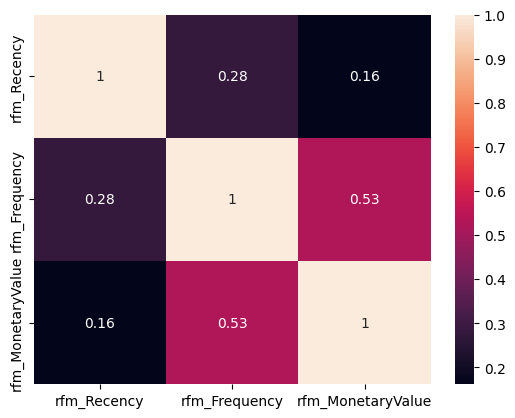

In [13]:
# check for any correlation between the variables

sns.heatmap(df.corr(), annot=True)

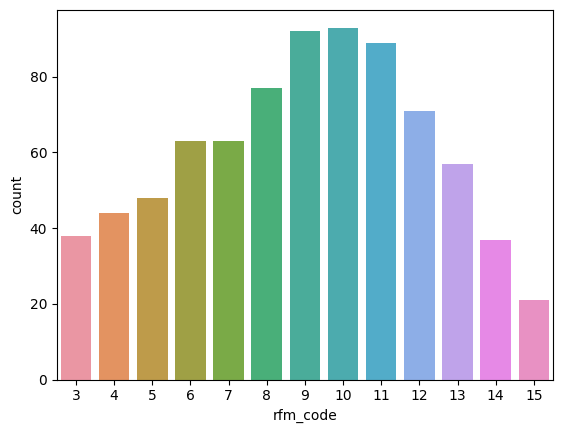

In [161]:
"""distribution of customers based on their rfm score calculated in sql just to get a hint as to what to expect.
"""
sns.countplot(data['rfm_code'])
plt.show()

In [121]:
# now, we scale the data. Athough not really nacessary since we do not have a very wide range of numbers
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [122]:
scaled_df

array([[-1.41198877, -1.41198877, -1.41198877],
       [ 1.41734059,  0.00267591, -0.70465643],
       [ 0.00267591, -0.70465643,  1.41734059],
       ...,
       [ 1.41734059, -0.70465643,  0.71000825],
       [ 0.00267591,  1.41734059,  1.41734059],
       [-0.70465643, -0.70465643, -1.41198877]])

## KMean Clustring

First, we run a range of different K-values to find the optimal K

In [123]:
inertia = []
val_range = range(1,10)
for i in val_range:
    kmean = KMeans(n_clusters=i)
    kmean.fit(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)

inertia

[2378.9999999999995,
 1437.9549753478616,
 1087.9994396063996,
 851.7241890823213,
 725.0815748180431,
 624.6175849218416,
 550.9181112170891,
 484.8179649405418,
 453.33153800796146]

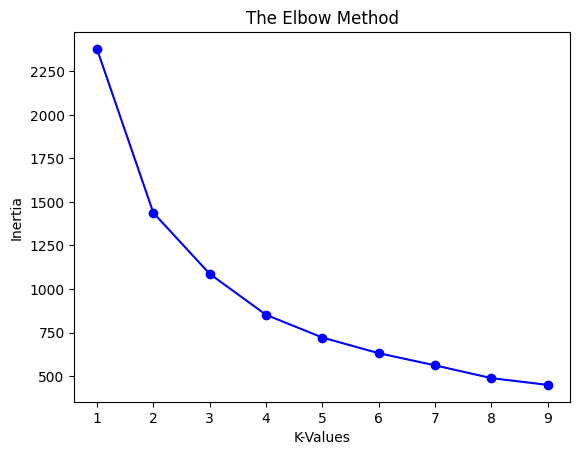

In [47]:
# using the elbow method to find the optimal k-value

plt.plot(val_range,inertia,'bo-')
plt.xlabel('K-Values') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method') 
plt.show()

In [142]:
kmeans = KMeans(n_clusters=4)           
kmeans.fit_predict(scaled_df)         
labels = kmeans.labels_
kmeans.inertia_

858.7371470437675

#### Dimensionality reduction to Convert the DataFrame into 2D DataFrame to view the clusters

In [143]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df

,PCA1,PCA2
0,-2.405438,-0.416049
1,0.163268,1.559841
2,0.414473,-0.483993
3,1.817115,-0.839744
4,2.115835,-0.211059
...,...,...
788,1.238373,0.392306
789,1.479461,0.654793
790,0.573183,1.075060
791,1.817115,-0.839744


In [144]:
pca_df["cluster"] = labels
pca_df.head()

,PCA1,PCA2,cluster
0,-2.405438,-0.416049,1
1,0.163268,1.559841,3
2,0.414473,-0.483993,2
3,1.817115,-0.839744,2
4,2.115835,-0.211059,0


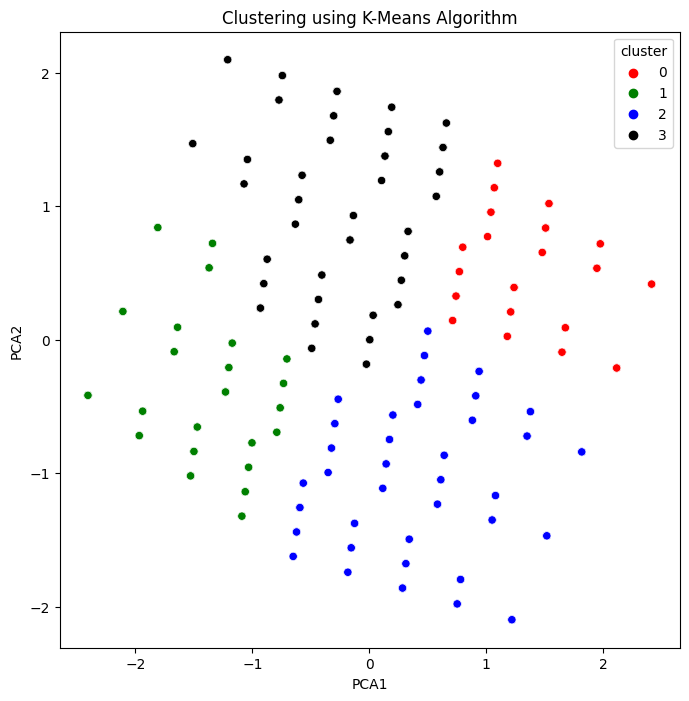

In [145]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [146]:
data.head()

,Customer_Name,max_order_date,last_order_date,MonetaryValue,Frequency,Recency,rfm_Recency,rfm_Frequency,rfm_MonetaryValue,rfm_code,rfm_string_code,Profit,Quantity,Total_Sales,Discount
0,Aaron Bergman,2018-12-30 00:00:00.0000000,2017-11-10 00:00:00.0000000,143818,6,415,1,1,1,3,111,1293465,13,143818,4
1,Aaron Hawkins,2018-12-30 00:00:00.0000000,2018-12-18 00:00:00.0000000,464630,11,12,5,3,2,10,532,1776741,54,464630,10
2,Aaron Smayling,2018-12-30 00:00:00.0000000,2018-10-03 00:00:00.0000000,2257567,10,88,3,2,5,10,325,-2480459,48,2257567,49
3,Adam Bellavance,2018-12-30 00:00:00.0000000,2018-11-06 00:00:00.0000000,5110574,18,54,3,5,5,13,355,19764208,56,5110574,8
4,Adam Hart,2018-12-30 00:00:00.0000000,2018-11-26 00:00:00.0000000,2343506,20,34,4,5,5,14,455,1734032,75,2343506,27


Now we got our cluster labels, let's add it to our original dataframe to get the cluster or label of each customer.

In [147]:
clustered_df = data.copy()
clustered_df["cluster"] = labels
clustered_df.head(10)

,Customer_Name,max_order_date,last_order_date,MonetaryValue,Frequency,Recency,rfm_Recency,rfm_Frequency,rfm_MonetaryValue,rfm_code,rfm_string_code,Profit,Quantity,Total_Sales,Discount,cluster
0,Aaron Bergman,2018-12-30 00:00:00.0000000,2017-11-10 00:00:00.0000000,143818,6,415,1,1,1,3,111,1293465,13,143818,4,1
1,Aaron Hawkins,2018-12-30 00:00:00.0000000,2018-12-18 00:00:00.0000000,464630,11,12,5,3,2,10,532,1776741,54,464630,10,3
2,Aaron Smayling,2018-12-30 00:00:00.0000000,2018-10-03 00:00:00.0000000,2257567,10,88,3,2,5,10,325,-2480459,48,2257567,49,2
3,Adam Bellavance,2018-12-30 00:00:00.0000000,2018-11-06 00:00:00.0000000,5110574,18,54,3,5,5,13,355,19764208,56,5110574,8,2
4,Adam Hart,2018-12-30 00:00:00.0000000,2018-11-26 00:00:00.0000000,2343506,20,34,4,5,5,14,455,1734032,75,2343506,27,0
5,Adam Shillingsburg,2018-12-30 00:00:00.0000000,2018-12-02 00:00:00.0000000,1970668,25,28,4,5,4,13,454,472799,81,1970668,45,0
6,Adrian Barton,2018-12-30 00:00:00.0000000,2018-11-19 00:00:00.0000000,2898788,20,41,4,5,5,14,455,6459722,73,2898788,48,0
7,Adrian Hane,2018-12-30 00:00:00.0000000,2018-10-31 00:00:00.0000000,559349,16,60,3,4,2,9,342,1645976,65,559349,38,3
8,Adrian Shami,2018-12-30 00:00:00.0000000,2018-11-19 00:00:00.0000000,5882,3,41,4,1,1,6,411,93108,9,5882,2,3
9,Aimee Bixby,2018-12-30 00:00:00.0000000,2018-11-19 00:00:00.0000000,280163,12,41,4,3,2,9,432,3210262,37,280163,16,3


In [148]:
clustered_df["cluster"].value_counts()

3    215
2    214
1    197
0    167
Name: cluster, dtype: int64

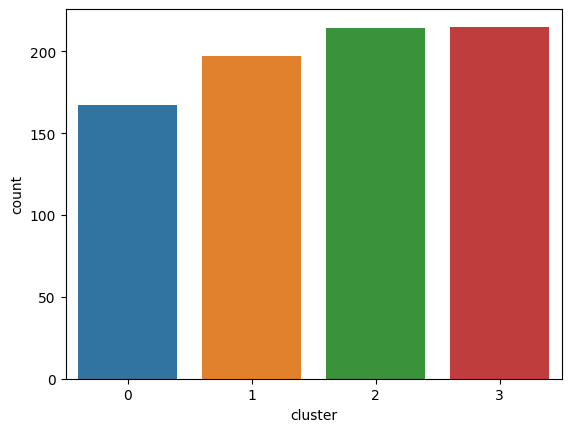

In [149]:
sns.countplot(x='cluster', data=clustered_df)
plt.show()

In [104]:
cluster_0 = clustered_df[clustered_df["cluster"]==0]
cluster_0.head(10)

,Customer_Name,max_order_date,last_order_date,MonetaryValue,Frequency,Recency,rfm_Recency,rfm_Frequency,rfm_MonetaryValue,rfm_code,rfm_string_code,Profit,Quantity,Total_Sales,Discount,cluster
2,Aaron Smayling,2018-12-30,2018-10-03,2257567,10,88,3,2,5,10,325,-2480459,48,2257567,49,0
16,Alejandro Ballentine,2018-12-30,2018-07-17,583602,14,166,2,4,2,8,242,1677986,39,583602,14,0
20,Alex Avila,2018-12-30,2018-06-29,5090484,11,184,2,3,5,10,235,-6775855,30,5090484,10,0
30,Amy Hunt,2018-12-30,2018-05-14,13672749,8,230,1,2,5,8,125,-2889407,35,13672749,40,0
45,Anna Häberlin,2018-12-30,2017-11-15,2616481,23,410,1,5,5,11,155,2373135,102,2616481,50,0
46,Anne McFarland,2018-12-30,2018-07-21,742669,22,162,2,5,3,10,253,3301871,81,742669,14,0
49,Annie Zypern,2018-12-30,2018-07-23,1350182,12,160,2,3,4,9,234,1412775,40,1350182,15,0
52,Anthony Johnson,2018-12-30,2018-07-17,2608313,21,166,2,5,5,12,255,5945396,88,2608313,31,0
54,Anthony Rawles,2018-12-30,2018-11-02,2959055,13,58,3,3,5,11,335,1697372,54,2959055,10,0
73,Bart Watters,2018-12-30,2018-08-31,4190918,17,121,2,4,5,11,245,2945586,74,4190918,24,0


In [106]:
cluster_0_temp = cluster_0.describe()
cluster_0_temp.style.background_gradient(cmap='Oranges')

,MonetaryValue,Frequency,Recency,rfm_Recency,rfm_Frequency,rfm_MonetaryValue,rfm_code,rfm_string_code,Profit,Quantity,Total_Sales,Discount,cluster
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,2154334.821839,14.862069,230.442529,1.827586,3.626437,3.948276,9.402299,222.971264,3042773.040230,56.643678,2154334.821839,27.137931,0.000000
std,2117060.186592,4.962687,181.588032,0.683529,1.038892,0.920337,1.355441,67.598049,7332143.275505,21.640508,2117060.186592,17.235648,0.000000
min,261800.000000,5.000000,53.000000,1.000000,1.000000,2.000000,7.000000,115.000000,-18609274.000000,18.000000,261800.000000,1.000000,0.000000
25%,956280.500000,11.000000,113.250000,1.000000,3.000000,3.000000,8.000000,145.000000,161988.000000,42.000000,956280.500000,14.000000,0.000000
50%,1493362.000000,14.000000,164.000000,2.000000,4.000000,4.000000,10.000000,235.000000,1881610.500000,51.000000,1493362.000000,23.000000,0.000000
75%,2260546.750000,17.000000,300.500000,2.000000,4.000000,5.000000,10.000000,254.000000,4283891.000000,66.750000,2260546.750000,35.000000,0.000000
max,14798847.000000,32.000000,1034.000000,3.000000,5.000000,5.000000,12.000000,343.000000,56899993.000000,150.000000,14798847.000000,107.000000,0.000000


In [107]:
cluster_1 = clustered_df[clustered_df["cluster"]==1]
cluster_1.head(10)

,Customer_Name,max_order_date,last_order_date,MonetaryValue,Frequency,Recency,rfm_Recency,rfm_Frequency,rfm_MonetaryValue,rfm_code,rfm_string_code,Profit,Quantity,Total_Sales,Discount,cluster
3,Adam Bellavance,2018-12-30,2018-11-06,5110574,18,54,3,5,5,13,355,19764208,56,5110574,8,1
4,Adam Hart,2018-12-30,2018-11-26,2343506,20,34,4,5,5,14,455,1734032,75,2343506,27,1
5,Adam Shillingsburg,2018-12-30,2018-12-02,1970668,25,28,4,5,4,13,454,472799,81,1970668,45,1
6,Adrian Barton,2018-12-30,2018-11-19,2898788,20,41,4,5,5,14,455,6459722,73,2898788,48,1
11,Alan Dominguez,2018-12-30,2018-12-01,1197155,12,29,4,3,4,11,434,3463536,40,1197155,7,1
32,Andrew Gjertsen,2018-12-30,2018-10-13,1210894,21,78,3,5,4,12,354,2357322,93,1210894,43,1
42,Anna Andreadi,2018-12-30,2018-11-05,1737756,18,55,3,5,4,12,354,2154130,64,1737756,25,1
44,Anna Gayman,2018-12-30,2018-09-24,24906012,15,97,3,4,5,12,345,-2240382,54,24906012,53,1
47,Anne Pryor,2018-12-30,2018-11-19,1033196,19,41,4,5,3,12,453,1964494,85,1033196,31,1
51,Anthony Jacobs,2018-12-30,2018-10-16,2037924,15,75,3,4,5,12,345,148076,62,2037924,13,1


In [108]:
cluster_1_temp = cluster_1.describe()
cluster_1_temp.style.background_gradient(cmap="icefire")

,MonetaryValue,Frequency,Recency,rfm_Recency,rfm_Frequency,rfm_MonetaryValue,rfm_code,rfm_string_code,Profit,Quantity,Total_Sales,Discount,cluster
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,2642679.429245,18.599057,36.981132,4.146226,4.382075,4.212264,12.740566,462.655660,3406976.353774,70.278302,2642679.429245,35.551887,1.000000
std,2599286.387636,5.363082,25.719405,0.742951,0.772918,0.874732,1.229054,73.726402,9080838.937114,21.267043,2599286.387636,19.103166,0.000000
min,322170.000000,8.000000,0.000000,3.000000,2.000000,2.000000,10.000000,344.000000,-36238614.000000,30.000000,322170.000000,2.000000,1.000000
25%,1225685.500000,15.000000,19.750000,4.000000,4.000000,4.000000,12.000000,434.000000,622015.750000,54.750000,1225685.500000,21.000000,1.000000
50%,1834766.500000,18.000000,31.500000,4.000000,5.000000,4.000000,13.000000,454.000000,2205696.500000,67.500000,1834766.500000,33.000000,1.000000
75%,3099158.250000,21.000000,48.000000,5.000000,5.000000,5.000000,14.000000,544.000000,4682193.500000,81.000000,3099158.250000,46.250000,1.000000
max,24906012.000000,37.000000,101.000000,5.000000,5.000000,5.000000,15.000000,555.000000,69170820.000000,146.000000,24906012.000000,111.000000,1.000000


In [109]:
cluster_2 = clustered_df[clustered_df["cluster"]==2]
cluster_2.head(10)

,Customer_Name,max_order_date,last_order_date,MonetaryValue,Frequency,Recency,rfm_Recency,rfm_Frequency,rfm_MonetaryValue,rfm_code,rfm_string_code,Profit,Quantity,Total_Sales,Discount,cluster
1,Aaron Hawkins,2018-12-30,2018-12-18,464630,11,12,5,3,2,10,532,1776741,54,464630,10,2
7,Adrian Hane,2018-12-30,2018-10-31,559349,16,60,3,4,2,9,342,1645976,65,559349,38,2
8,Adrian Shami,2018-12-30,2018-11-19,5882,3,41,4,1,1,6,411,93108,9,5882,2,2
9,Aimee Bixby,2018-12-30,2018-11-19,280163,12,41,4,3,2,9,432,3210262,37,280163,16,2
10,Alan Barnes,2018-12-30,2018-12-05,397663,14,25,5,4,2,11,542,1208113,48,397663,19,2
12,Alan Haines,2018-12-30,2018-11-05,707693,8,55,3,2,3,8,323,-2261620,28,707693,28,2
13,Alan Hwang,2018-12-30,2018-12-24,476065,13,6,5,4,2,11,542,10080878,53,476065,12,2
14,Alan Schoenberger,2018-12-30,2018-12-08,450796,13,22,5,3,2,10,532,3039256,41,450796,8,2
18,Alejandro Savely,2018-12-30,2018-12-11,568434,8,19,5,2,2,9,522,3158988,39,568434,18,2
21,Alex Grayson,2018-12-30,2018-12-22,77502,9,8,5,2,1,8,521,531064,47,77502,21,2


In [110]:
cluster_2_temp = cluster_2.describe()
cluster_2_temp.style.background_gradient(cmap="Spectral")

,MonetaryValue,Frequency,Recency,rfm_Recency,rfm_Frequency,rfm_MonetaryValue,rfm_code,rfm_string_code,Profit,Quantity,Total_Sales,Discount,cluster
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,620461.790476,9.966667,39.147619,4.100000,2.409524,2.271429,8.780952,436.366667,1620729.804762,38.176190,620461.790476,15.509524,2.000000
std,477379.153124,3.479789,28.137430,0.821074,0.989855,0.967235,1.397064,83.052032,4958955.844017,15.036237,477379.153124,9.613209,0.000000
min,5882.000000,2.000000,0.000000,3.000000,1.000000,1.000000,6.000000,313.000000,-41218448.000000,6.000000,5882.000000,0.000000,2.000000
25%,271178.500000,8.000000,15.000000,3.000000,2.000000,2.000000,8.000000,341.250000,345779.000000,29.000000,271178.500000,8.000000,2.000000
50%,540116.000000,10.000000,34.000000,4.000000,2.000000,2.000000,9.000000,424.000000,1090737.500000,38.000000,540116.000000,14.000000,2.000000
75%,805372.250000,12.000000,57.000000,5.000000,3.000000,3.000000,10.000000,522.000000,2607020.500000,48.000000,805372.250000,20.000000,2.000000
max,3309431.000000,21.000000,102.000000,5.000000,5.000000,5.000000,11.000000,551.000000,28760402.000000,86.000000,3309431.000000,56.000000,2.000000


In [111]:
cluster_3 = clustered_df[clustered_df["cluster"]==3]
cluster_3.head(10)

,Customer_Name,max_order_date,last_order_date,MonetaryValue,Frequency,Recency,rfm_Recency,rfm_Frequency,rfm_MonetaryValue,rfm_code,rfm_string_code,Profit,Quantity,Total_Sales,Discount,cluster
0,Aaron Bergman,2018-12-30,2017-11-10,143818,6,415,1,1,1,3,111,1293465,13,143818,4,3
15,Alan Shonely,2018-12-30,2018-06-21,501871,13,192,2,3,2,7,232,494721,39,501871,35,3
17,Alejandro Grove,2018-12-30,2018-03-27,226563,14,278,1,4,1,6,141,5237131,58,226563,2,3
19,Aleksandra Gannaway,2018-12-30,2018-09-03,53214,5,118,2,1,1,4,211,149832,16,53214,4,3
22,Alex Russell,2018-12-30,2018-09-10,957954,5,111,2,1,3,6,213,-2429487,18,957954,13,3
25,Allen Goldenen,2018-12-30,2018-09-07,52508,8,114,2,2,1,5,221,388953,33,52508,18,3
26,Allen Rosenblatt,2018-12-30,2018-08-27,1780827,7,125,2,1,4,7,214,-2029666,29,1780827,7,3
27,Alyssa Crouse,2018-12-30,2018-05-12,779856,5,232,1,1,3,5,113,-179712,17,779856,16,3
31,Andrew Allen,2018-12-30,2018-04-15,193048,12,259,1,3,1,5,131,4358274,36,193048,2,3
34,Andy Gerbode,2018-12-30,2016-09-07,749681,9,844,1,2,3,6,123,-807487,33,749681,14,3


In [155]:
cluster_3[cluster_3["rfm_MonetaryValue"] ==1]["rfm_Recency"].count()
#cluster_0.value_counts()
#cluster_0["rfm_Recency"].count()

110

In [156]:
cluster_3_temp = cluster_3.describe()
cluster_3_temp.style.background_gradient(cmap="coolwarm")

,MonetaryValue,Frequency,Recency,rfm_Recency,rfm_Frequency,rfm_MonetaryValue,rfm_code,rfm_string_code,Profit,Quantity,Total_Sales,Discount,cluster
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,336002.263959,6.964467,305.751269,1.614213,1.573604,1.619289,4.807107,178.776650,1054833.527919,25.893401,336002.263959,10.253807,3.000000
std,340937.521308,3.005735,228.551280,0.702329,0.783056,0.803204,1.238560,70.609163,2191433.095032,12.450056,340937.521308,8.333394,0.000000
min,1652.000000,1.000000,53.000000,1.000000,1.000000,1.000000,3.000000,111.000000,-5407848.000000,2.000000,1652.000000,0.000000,3.000000
25%,94828.000000,5.000000,119.000000,1.000000,1.000000,1.000000,4.000000,112.000000,32633.000000,17.000000,94828.000000,4.000000,3.000000
50%,237926.000000,7.000000,232.000000,1.000000,1.000000,1.000000,5.000000,132.000000,487017.000000,25.000000,237926.000000,9.000000,3.000000
75%,484320.000000,9.000000,421.000000,2.000000,2.000000,2.000000,6.000000,222.000000,1746589.000000,33.000000,484320.000000,14.000000,3.000000
max,1935380.000000,16.000000,1165.000000,3.000000,4.000000,4.000000,7.000000,321.000000,10923202.000000,67.000000,1935380.000000,42.000000,3.000000
